In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
files = [
    "data/cotacoes_altas.txt",
    "data/cotacoes_baixas.txt"
]

cols = ["Ticker", "Nome", "Preco", "Var_dia", "Var_12m", "Setor"]
dfs = []

for path in files:
    df_temp = pd.read_csv(path, header=None, names=cols)
    dfs.append(df_temp)

In [20]:
df = pd.concat(dfs, ignore_index=True)

df["Preco"]   = pd.to_numeric(df["Preco"],   errors="coerce")
df["Var_dia"] = pd.to_numeric(df["Var_dia"], errors="coerce")
df["Var_12m"] = pd.to_numeric(df["Var_12m"], errors="coerce")

df.head()


,Ticker,Nome,Preco,Var_dia,Var_12m,Setor
0,IFCM3,INFRACOMM ON NM,0.08,14.28,-80.82,Tecnologia E Internet
1,BRKM3,BRASKEM ON N1,11.98,9.00,-37.01,Petroquímico
2,LPSB3,LOPES BRASILON NM,1.71,6.87,-22.01,Imobiliário E Construção
3,RCSL4,RECRUSUL PN,1.25,6.83,-15.54,Industrial
4,HBTS5,HABITASUL PNA,30.95,5.95,-18.61,Outros


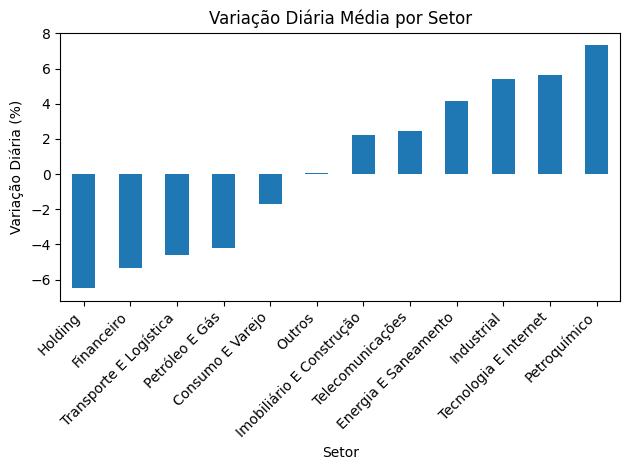

In [24]:
sector_avg = df.groupby("Setor")["Var_dia"].mean().sort_values()
sector_avg.plot(kind="bar")
plt.title("Variação Diária Média por Setor")
plt.xlabel("Setor")
plt.ylabel("Variação Diária (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()